/Users/liyuefan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


2010-01-01 00:00:00
2010-04-01 00:00:00
2010-07-01 00:00:00
2010-10-01 00:00:00
2011-01-01 00:00:00
2011-04-01 00:00:00
2011-07-01 00:00:00
2011-10-01 00:00:00
2012-01-01 00:00:00


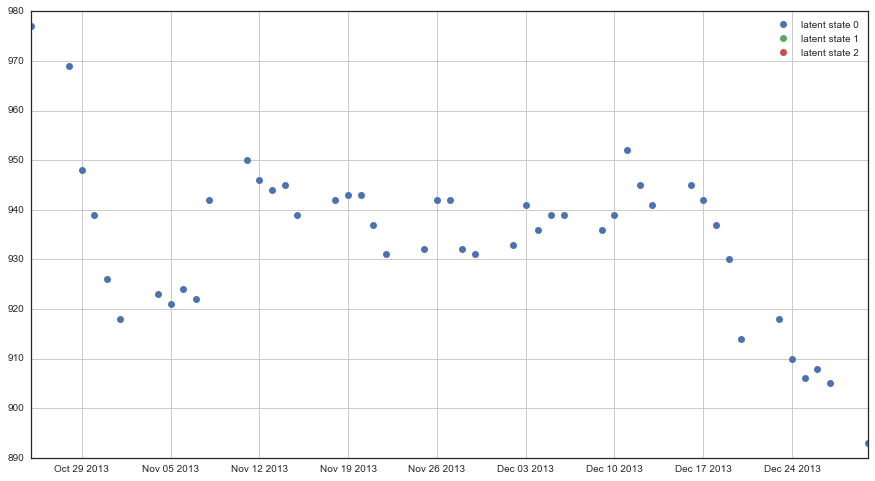

[(0, -0.048025214565110191)]
0.603773584906
0.396226415094
0.603773584906


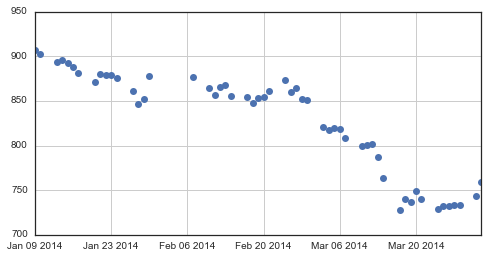

0.603773584906
2012-04-01 00:00:00


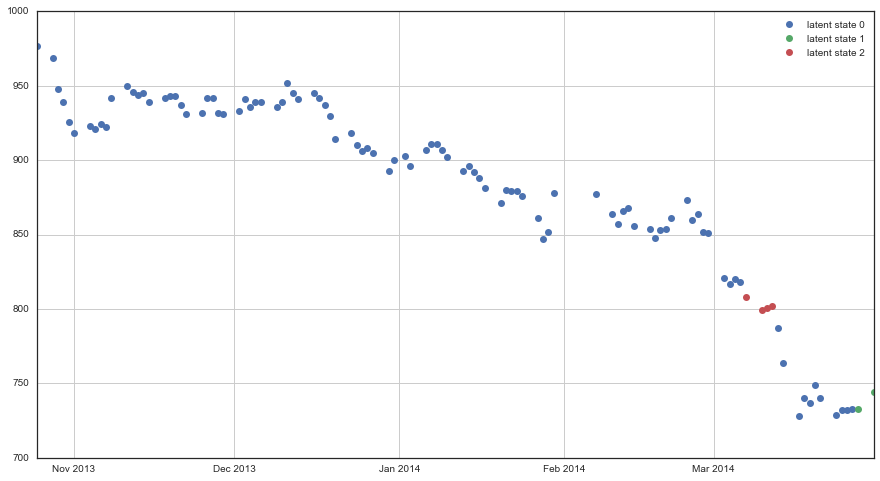

[(2, -0.66770964999958993), (0, -0.14371463079349764), (1, 3.2454811412729825)]
0.592592592593
0.388888888889
0.611111111111


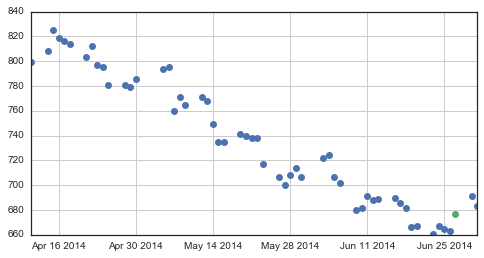

0.598183088749
2012-07-01 00:00:00


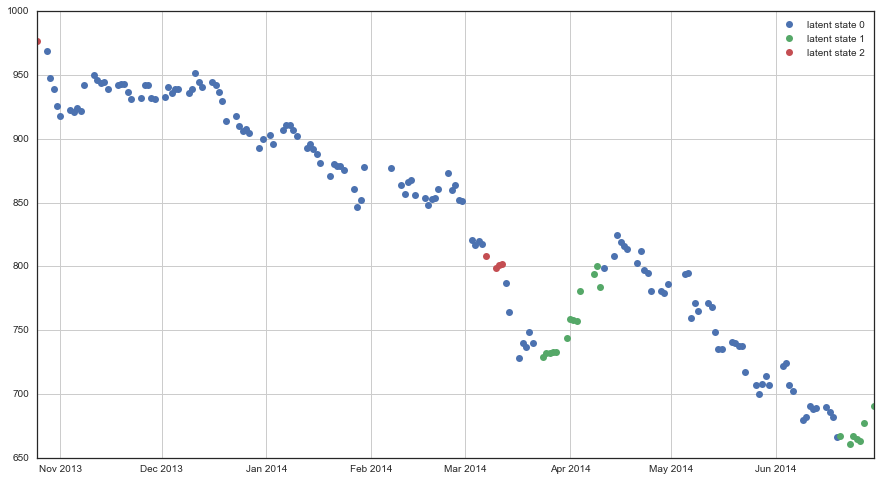

[(2, -0.66956562287705612), (0, -0.23904628409225412), (1, 0.48114730186780685)]
0.578947368421
0.421052631579
0.578947368421


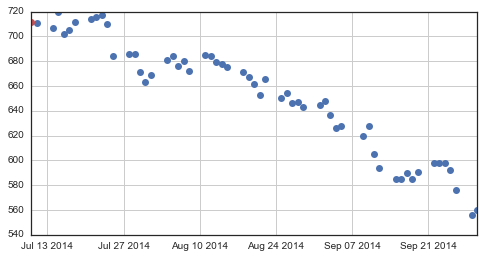

0.591771181973
2012-10-01 00:00:00


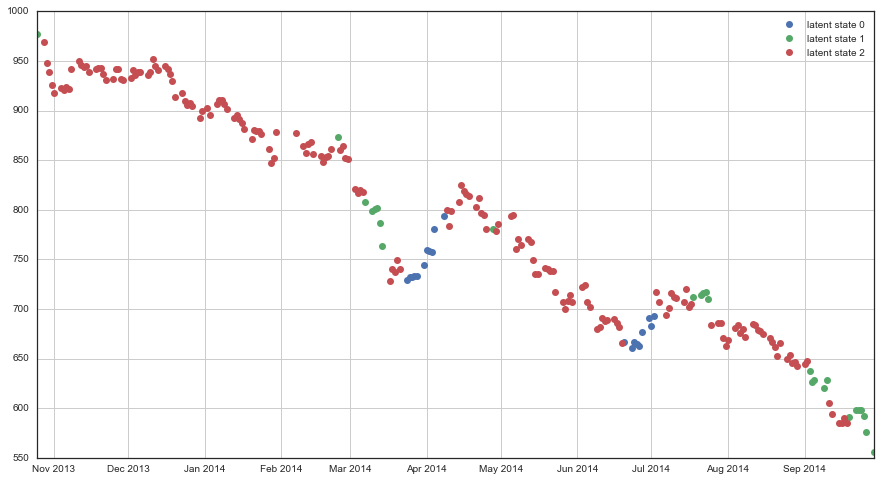

[(1, -0.72246495207121775), (2, -0.19458937213934421), (0, 0.62970713856175398)]
0.618181818182
0.381818181818
0.618181818182


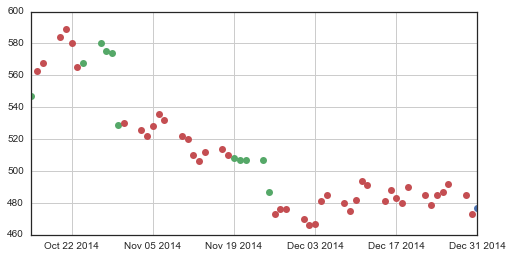

0.598373841025
2013-01-01 00:00:00


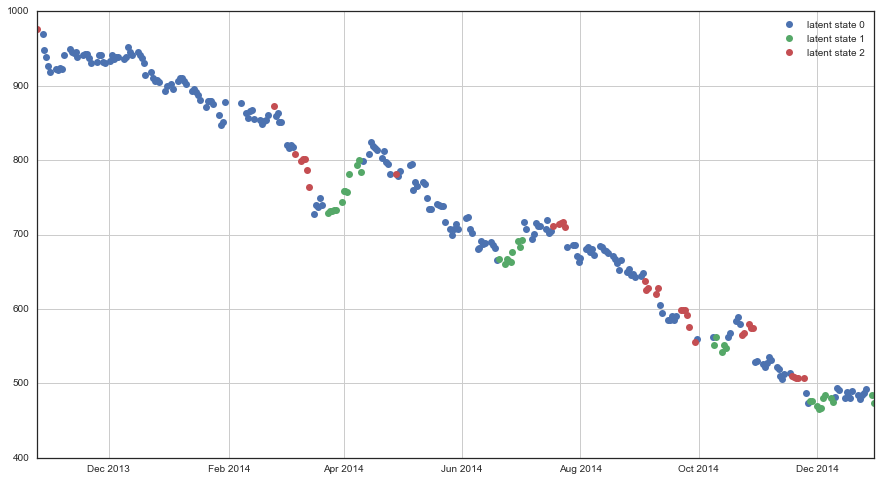

[(2, -0.65092695070210238), (0, -0.19816895614404625), (1, 0.5558974329387707)]
0.603773584906
0.377358490566
0.622641509434


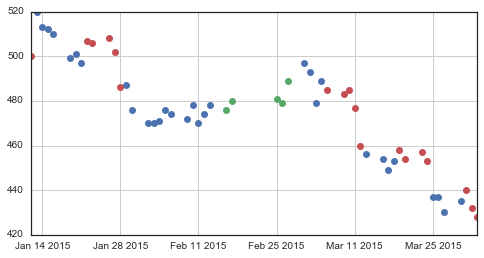

0.599453789801
2013-04-01 00:00:00


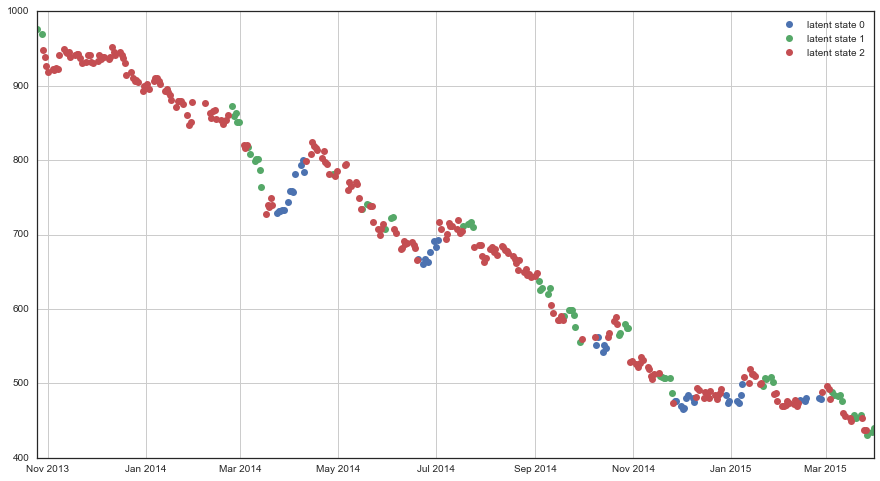

[(1, -0.69218701120526338), (2, -0.15251673888583428), (0, 0.46714207697623611)]
0.581818181818
0.490909090909
0.509090909091


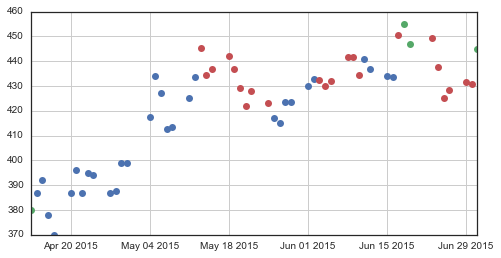

0.596514521804
2013-07-01 00:00:00


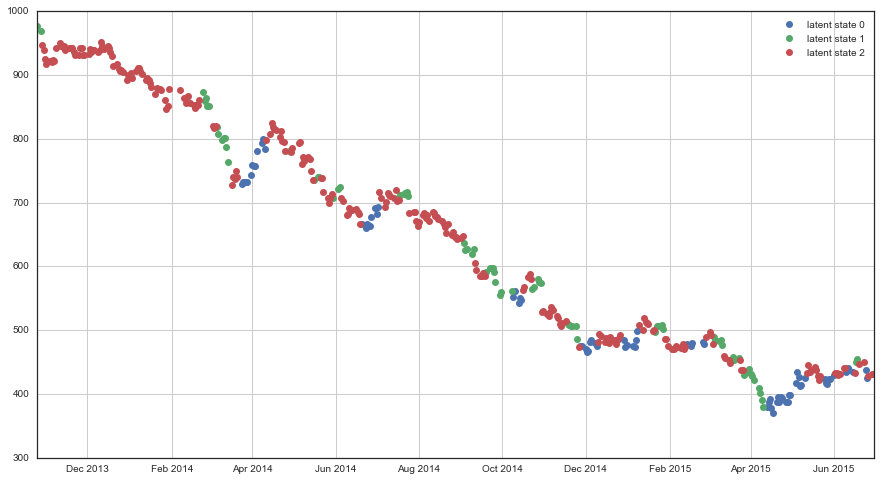

[(1, -0.66361954071678819), (2, -0.18038870866291742), (0, 0.43210077867025898)]
0.553571428571
0.482142857143
0.517857142857


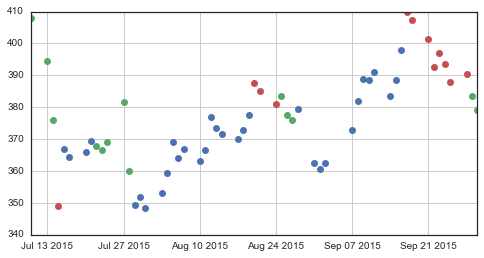

0.590379794199
2013-10-01 00:00:00


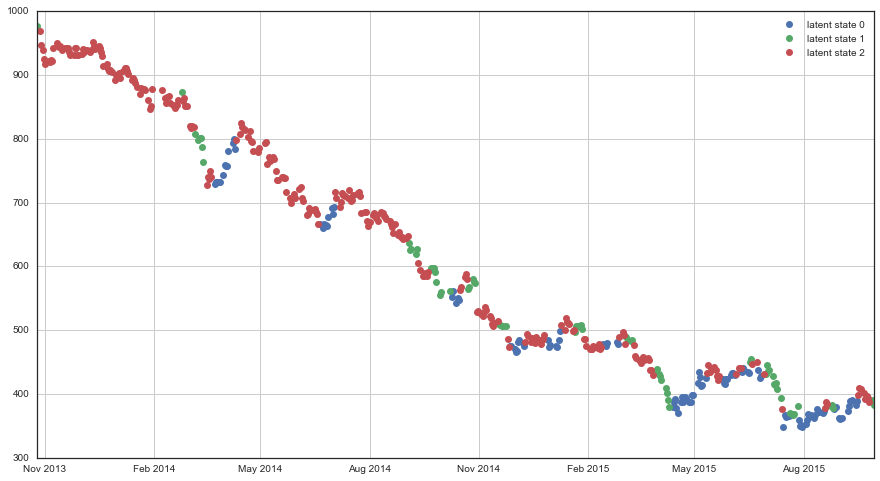

[(1, -0.61668612531277767), (2, -0.23186318575109566), (0, 0.38678625897531171)]
0.581818181818
0.509090909091
0.490909090909


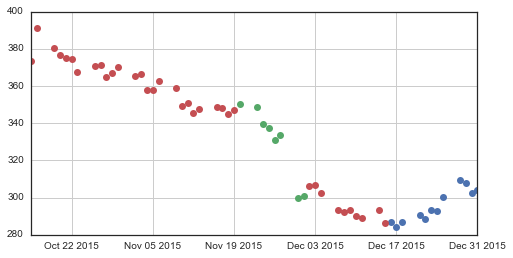

0.589309592652
2014-01-01 00:00:00


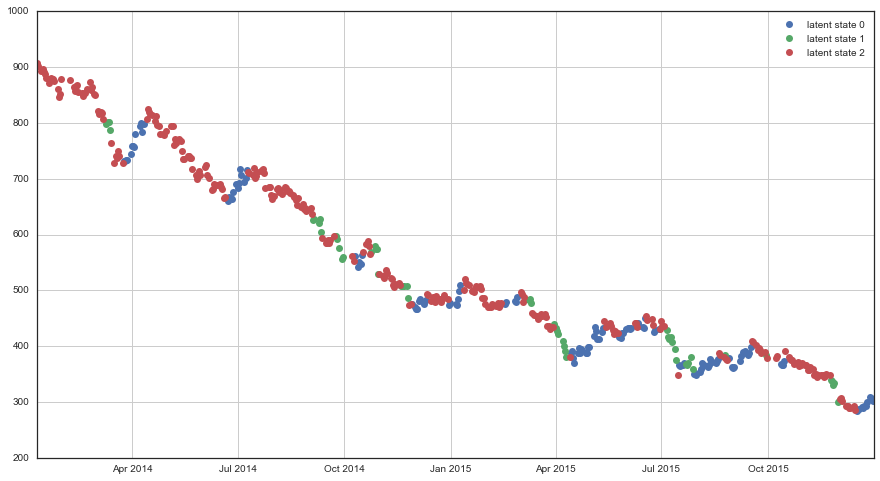

[(1, -0.60705601016551847), (2, -0.28703776687348698), (0, 0.376784533288473)]
0.592592592593
0.592592592593
0.407407407407


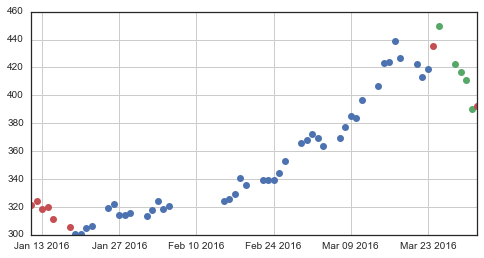

0.589674370423
2014-04-01 00:00:00


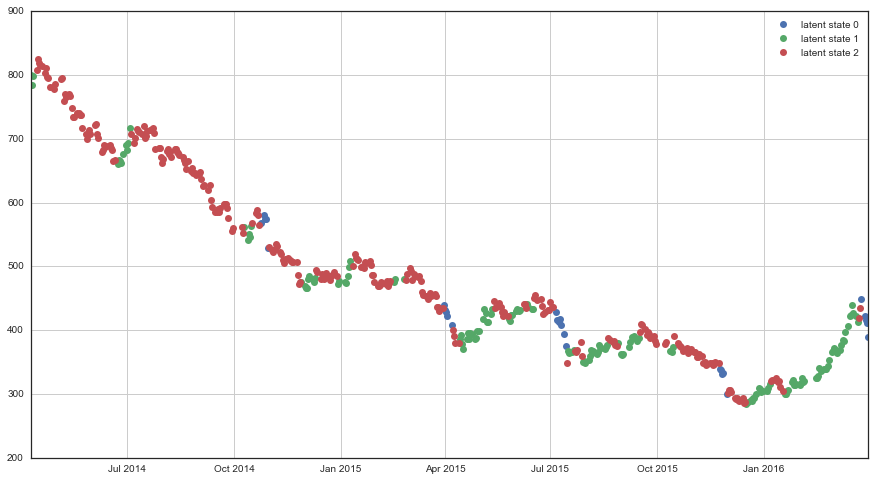

[(0, -0.56744223128340776), (2, -0.34412937206126365), (1, 0.40612689652611589)]
0.592592592593
0.5
0.5


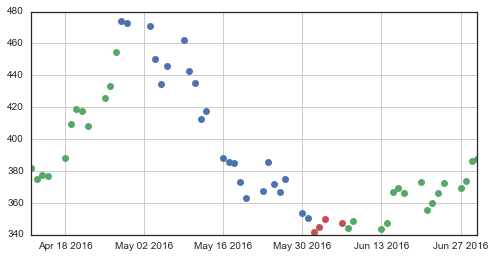

0.58996619264
2014-07-01 00:00:00


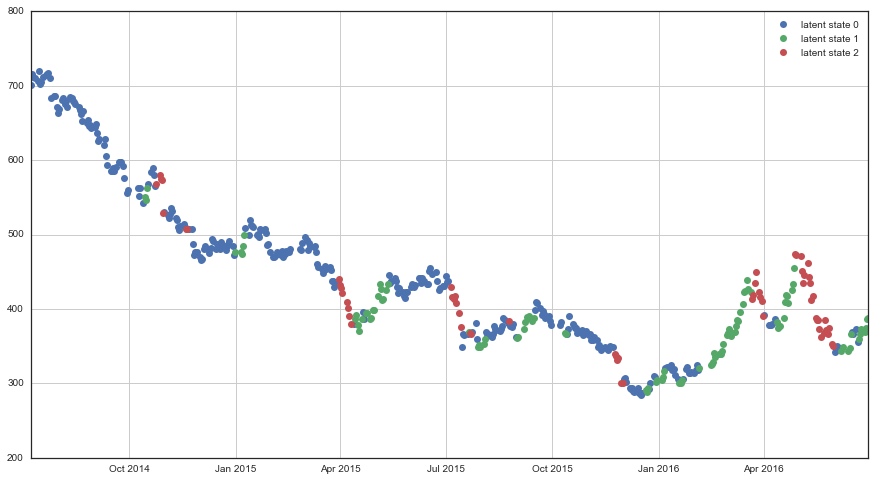

[(2, -0.56838284206057821), (0, -0.13617536386635273), (1, 0.48577133871224398)]
0.517857142857
0.446428571429
0.553571428571


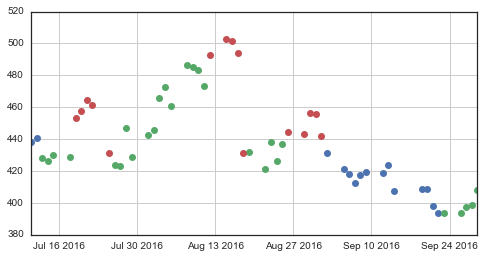

0.583410824478
2014-10-01 00:00:00


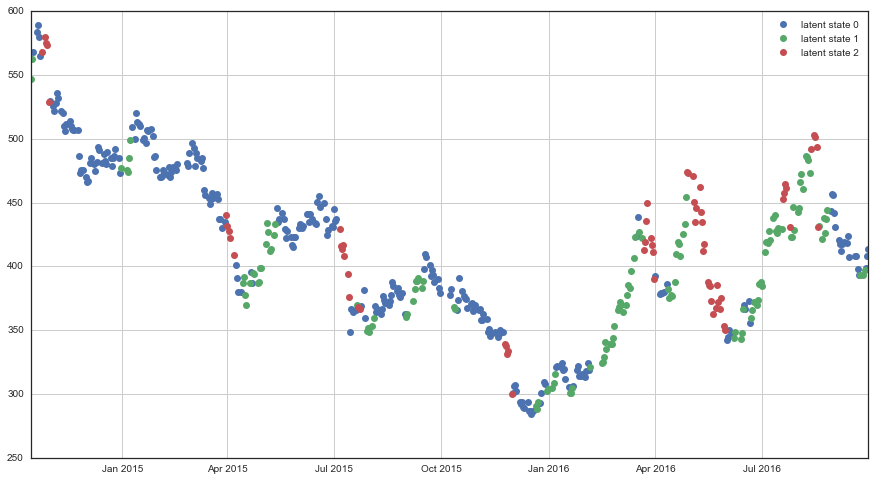

[(2, -0.50308134795158765), (0, -0.15466010005295028), (1, 0.47020936548983749)]
0.578947368421
0.605263157895
0.394736842105


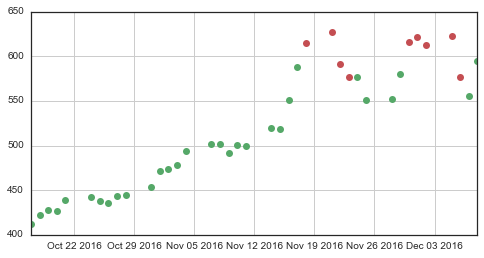

0.583038869806
2015-01-01 00:00:00
2015-04-01 00:00:00
2015-07-01 00:00:00
2015-10-01 00:00:00
2016-01-01 00:00:00
2016-04-01 00:00:00
2016-07-01 00:00:00
2016-10-01 00:00:00


In [1]:
#! /Users/liyuefan/anaconda2/bin/python
#  coding: utf-8


from hmmlearn.hmm import GMMHMM, GaussianHMM
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

warnings.filterwarnings('ignore')

data_raw = pd.read_csv('/Users/liyuefan/Documents/gtja/IFI_1207.csv', header=0, encoding='gbk')
data_raw['update_date'] = pd.to_datetime(data_raw['update_date'])
new_data = pd.DataFrame()
for col in data_raw.columns:
    if col == 'update_date':
        time = list(data_raw[col][1:])
        time.append(np.max(time)+np.timedelta64(1,'D'))
        new_data[col] = time
    else:
        new_data[col] = data_raw[col]
data = new_data


ds = pd.to_datetime('2010-01-01')
acc_list=[]
for day in pd.date_range(ds,np.max(data['update_date'])):
#     try:
        if day.month in [1, 4, 7, 10] and day.day == 1:
            print day
            train_data = data[data['update_date'] <= day + np.timedelta64(2, 'Y')]
            train_data = train_data[train_data['update_date'] >= day]
            train_data = train_data.dropna(axis=0)
            test_data = data[data['update_date'] >= day + np.timedelta64(2, 'Y') + np.timedelta64(1, 'D')]
            test_data = test_data[test_data['update_date']
                                  <= np.min((np.max(data['update_date']),
                                             day + np.timedelta64(2, 'Y') + np.timedelta64(3, 'M')))]
            test_data = test_data.dropna(axis=0)
            train_close = data_raw[data_raw['update_date'] <= day + np.timedelta64(2, 'Y')]
            train_close = train_close[train_close['update_date'] >= day]

            test_close = data_raw[data_raw['update_date'] >= day + np.timedelta64(2, 'Y') + np.timedelta64(1, 'D')]
            test_close = test_close[test_close['update_date']
                                    <= np.min((np.max(data['update_date']),
                                               day + np.timedelta64(2, 'Y') + np.timedelta64(3, 'M')))]
            train_close=train_close.dropna(axis=0)
            test_close=test_close.dropna(axis=0)

            if len(test_data) > 0 and len(train_data) > 0:
                r_5 = np.array(np.log(train_data['close'][5:])) - np.array(np.log(train_data['close'][:-5]))
#                 r_5 = stats.boxcox(r_5)
                r_1 = (np.array(np.log(train_data['close'][1:])) - np.array(np.log(train_data['close'][:-1])))[4:]
                r_1_raw = (np.array(np.log(train_close['close'][1:])) 
                           - np.array(np.log(train_close['close'][:-1])))[5:]
#                 r_1 = stats.boxcox(r_1)
                r_range = (np.array(np.log(train_data['high'])) 
                           - np.array(np.log(train_data['low'])))[5:]
    
                r_1 = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_1))
                r_5 = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_5))
                r_range = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_range))

#                 r_range = stats.boxcox(r_range)
#                 r_volume = (np.array(np.log(train_data['volume'][1:]))
#                             - np.array(np.log(train_data['volume'][:-1])))[4:]

                date_list = train_close['update_date'][5:]

                r_5_test = np.array(np.log(test_data['close'][5:])) - np.array(np.log(test_data['close'][:-5]))
#                 r_t_test = stats.boxcox(r_5_test)
                r_1_test = (np.array(np.log(test_data['close'][1:]))
                            - np.array(np.log(test_data['close'][:-1])))[4:]
                r_1_test = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_1_test))
                r_5_test = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_5_test))

                r_1_test_raw = (np.array(np.log(test_close['close'][1:])) - np.array(np.log(test_close['close'][:-1])))[5:]


#                 r_1_test = stats.boxcox(r_1_test)
                r_range_test = (np.array(np.log(test_data['high'])) - np.array(np.log(test_data['low'])))[5:]
                r_range_test = np.array(map(lambda x: 0 if x==np.inf or x==-np.inf or np.isnan(x) else x, r_range_test))


    
#                 r_range_test = stats.boxcox(r_range_test)
#                 r_volume_test = (np.array(np.log(test_data['volume'][1:]))
#                                  - np.array(np.log(test_data['volume'][:-1])))[4:]
                date_list_test = test_data['update_date'][5:]

                X = np.column_stack([r_1, r_5, r_range])

                X_test = np.column_stack([r_1_test, r_5_test, r_range_test])

                hmm = GaussianHMM(n_components=3, covariance_type='diag', n_iter=2000).fit(X)
                latent_states_sequence_train = hmm.predict(X)
#                 latent_states_sequence_train = list(latent_states_sequence_train)
#                 latent_states_sequence_train = np.array(latent_states_sequence_train[::-1])
                
                
                
                sns.set_style('white')

                mean_return_dict = {}
                plt.figure(figsize=(15, 8))
                for i in range(hmm.n_components):
                    state = (latent_states_sequence_train == i)
                    plt.plot(date_list[state], train_close['close'][state], 'o', label='latent state %d' % i, lw=5)
                    plt.legend()
                    plt.grid(1)
                    mean_return_dict[i] = np.mean(r_1[state])/np.std(r_1[state])

                plt.show()

                latent_states_sequence_test = hmm.predict(X_test)
#                 latent_states_sequence_test = list(latent_states_sequence_test)
#                 latent_states_sequence_test = np.array(latent_states_sequence_test[::-1])

                
                
                pair = mean_return_dict.items()
#                 pair = filter(lambda x: False if np.abs(x[1][0])<=0.5*x[1][1] else True,pair)
                pair = filter(lambda x: False if np.isnan(x[1]) else True, pair)
                pair_sorted = sorted(pair, key=lambda x: x[1])
                print pair_sorted



                expected_return_series = map(lambda x: mean_return_dict[x], latent_states_sequence_test)
                expected_return_series = np.array(map(lambda x: 1 if x > 0 else -1, expected_return_series[:-1]))
                real_return_series = r_1_test[1:]
                real_return_series = np.array(map(lambda x: 1 if x > 0 else -1, real_return_series))

                temp = expected_return_series - real_return_series
                temp = filter(lambda x: True if np.isnan(x) == False else False, temp)
                acc_rate=(len(temp) - np.sum(np.abs(temp)) / 2.) / len(temp)
                acc_list.append(acc_rate)
                print acc_rate
                real_return_series = list(real_return_series)
                print real_return_series.count(1) / float(len(real_return_series))
                print real_return_series.count(-1) / float(len(real_return_series))
                
#                 prediction=pd.DataFrame(X_test)
                prediction=pd.DataFrame()
                prediction['update_date']=date_list_test
                prediction['state']=latent_states_sequence_test
                prediction['expected_sharpe']=prediction['state'].apply(lambda x:mean_return_dict[x])

                sns.set_style('white')
                plt.figure(figsize=(8, 4))
                for i in range(hmm.n_components):
                    state = (latent_states_sequence_test == i)
                    plt.plot(date_list_test[state], test_close['close'][state], 'o', label='latent state %d' % i, lw=5)
                    plt.grid(1)

                plt.show()
                print np.mean(acc_list)
            else:
                pass
        else:
            pass
#     except:
#         pass


In [3]:
prediction

,update_date,state,expected_sharpe
730,2016-10-17,0,0.470209
731,2016-10-18,0,0.470209
732,2016-10-19,0,0.470209
733,2016-10-20,0,0.470209
734,2016-10-21,0,0.470209
735,2016-10-24,0,0.470209
736,2016-10-25,0,0.470209
737,2016-10-26,0,0.470209
738,2016-10-27,0,0.470209
739,2016-10-28,0,0.470209
